# Complex Machine Learning and Keras- PART 2

### 1) Importing Libraries and Loading Data

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [110]:
#Create a path to where your data is stored.
path = r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 2\01-2026- Analysis\01 Data'

In [111]:
#Read in the Regular weather data.
df = pd.read_csv(os.path.join(path, 'climate_cleaned.csv'))
df

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_pressure  \
0                  6.5             0.8  ...             1.0003   
1                  6.1             3.3  ...             1.0007   
2                  8.5             5.1  ...             1.0096   
3                  6.3             3.8  ...             1.0184   
4                  3.0            -0.7  ...             1.0328   
...                ...             ...  ...                ...   
22945             15.9            11.4  ...             1.0142   
22946             16.7            14.3  ...             1.0142   
22947             16.7            13.1  ...             1.0142   
22948             15.4            11.6  ...             1.0142   
22949             13.5             9.9  ...             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                           0.45                    0.34                4.7   
1                           0.25                    0.84                0.7   
2                           0.17                    0.08                0.1   
3                           0.13                    0.98                0.0   
4                           0.46                    0.00                5.7   
...                          ...                     ...                ...   
22945                       1.13                    0.41                3.4   
22946                       1.13                    0.41                3.4   
22947                       1.13                    0.41                3.4   
22948                       1.13                    0.41                3.4   
22949                       1.13                    0.41                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  \
0                     8.5                6.0               10.9   
1                     8.9                5.6               12.1   
2                    10.5                8.1               12.9   
3                     7.4                7.3               10.6   
4                     5.7                3.0                8.4   
...                   ...                ...                ...   
22945                10.7         

In [112]:
#Read in the Pleasant weather data.
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

### 2) Data Cleaning for Exercise

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 137 entries, DATE to MUNCHENB_pressure
dtypes: float64(120), int64(17)
memory usage: 24.0 MB


In [114]:
pleasant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   DATE                         22950 non-null  int64
 1   BASEL_pleasant_weather       22950 non-null  int64
 2   BELGRADE_pleasant_weather    22950 non-null  int64
 3   BUDAPEST_pleasant_weather    22950 non-null  int64
 4   DEBILT_pleasant_weather      22950 non-null  int64
 5   DUSSELDORF_pleasant_weather  22950 non-null  int64
 6   HEATHROW_pleasant_weather    22950 non-null  int64
 7   KASSEL_pleasant_weather      22950 non-null  int64
 8   LJUBLJANA_pleasant_weather   22950 non-null  int64
 9   MAASTRICHT_pleasant_weather  22950 non-null  int64
 10  MADRID_pleasant_weather      22950 non-null  int64
 11  MUNCHENB_pleasant_weather    22950 non-null  int64
 12  OSLO_pleasant_weather        22950 non-null  int64
 13  SONNBLICK_pleasant_weather   22950 non-null  i

In [115]:
df.shape

(22950, 137)

In [116]:
pleasant.shape

(22950, 16)

In [117]:
# Filter data for years 2000-2009
# Convert DATE column to string and extract year
df['Year'] = df['DATE'].astype(str).str[:4].astype(int)
pleasant['Year'] = pleasant['DATE'].astype(str).str[:4].astype(int)

# Filter for years 2000-2009
df_2000 = df[(df['Year'] >= 2000) & (df['Year'] <= 2009)].reset_index(drop=True)
pleasant_2000 = pleasant[(pleasant['Year'] >= 2000) & (pleasant['Year'] <= 2009)].reset_index(drop=True)

# Drop the Year column if you don't need it
df_2000 = df_2000.drop(columns=['Year'])
pleasant_2000 = pleasant_2000.drop(columns=['Year'])

print(f"Climate data 2000-2009 shape: {df_2000.shape}")
print(f"Pleasant weather data 2000-2009 shape: {pleasant_2000.shape}")

# Display first few rows
print("\nClimate Data (2000-2009) - First 5 rows:")
print(df_2000.head())

print("\nPleasant Weather Data (2000-2009) - First 5 rows:")
print(pleasant_2000.head())

Climate data 2000-2009 shape: (3653, 137)
Pleasant weather data 2000-2009 shape: (3653, 16)

Climate Data (2000-2009) - First 5 rows:
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp

In [118]:
# prepping for Random Forest
x = df_2000.drop(columns=['DATE','MONTH'])
x.shape

(3653, 135)

In [119]:
y = pleasant_2000['BASEL_pleasant_weather']  # Example target variable
y.shape

(3653,)

In [120]:
# Conversion step:
x = np.array(x)  # X contains the weather features (like temperature, humidity, etc.)
y = np.array(y)  # y contains whether the day was 'pleasant' (1) or not (0)

# Check:
print("Feature matrix shape (x):", x.shape)  # Should print (3652, 135)
print("Target variable shape (y):", y.shape)  # Should print (3652,)

Feature matrix shape (x): (3653, 135)
Target variable shape (y): (3653,)


### 3) Random Forest Models

In [121]:
stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [122]:
# Create train and test splits from the reshaped arrays
from sklearn.model_selection import train_test_split

# Split the reshaped data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42
)

print("Train and Test Set Shapes:")
print("=" * 60)
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Train and Test Set Shapes:
X_train shape: (2922, 135)
X_test shape: (731, 135)
y_train shape: (2922,)
y_test shape: (731,)


In [123]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

RandomForestClassifier()

In [124]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9917920656634747


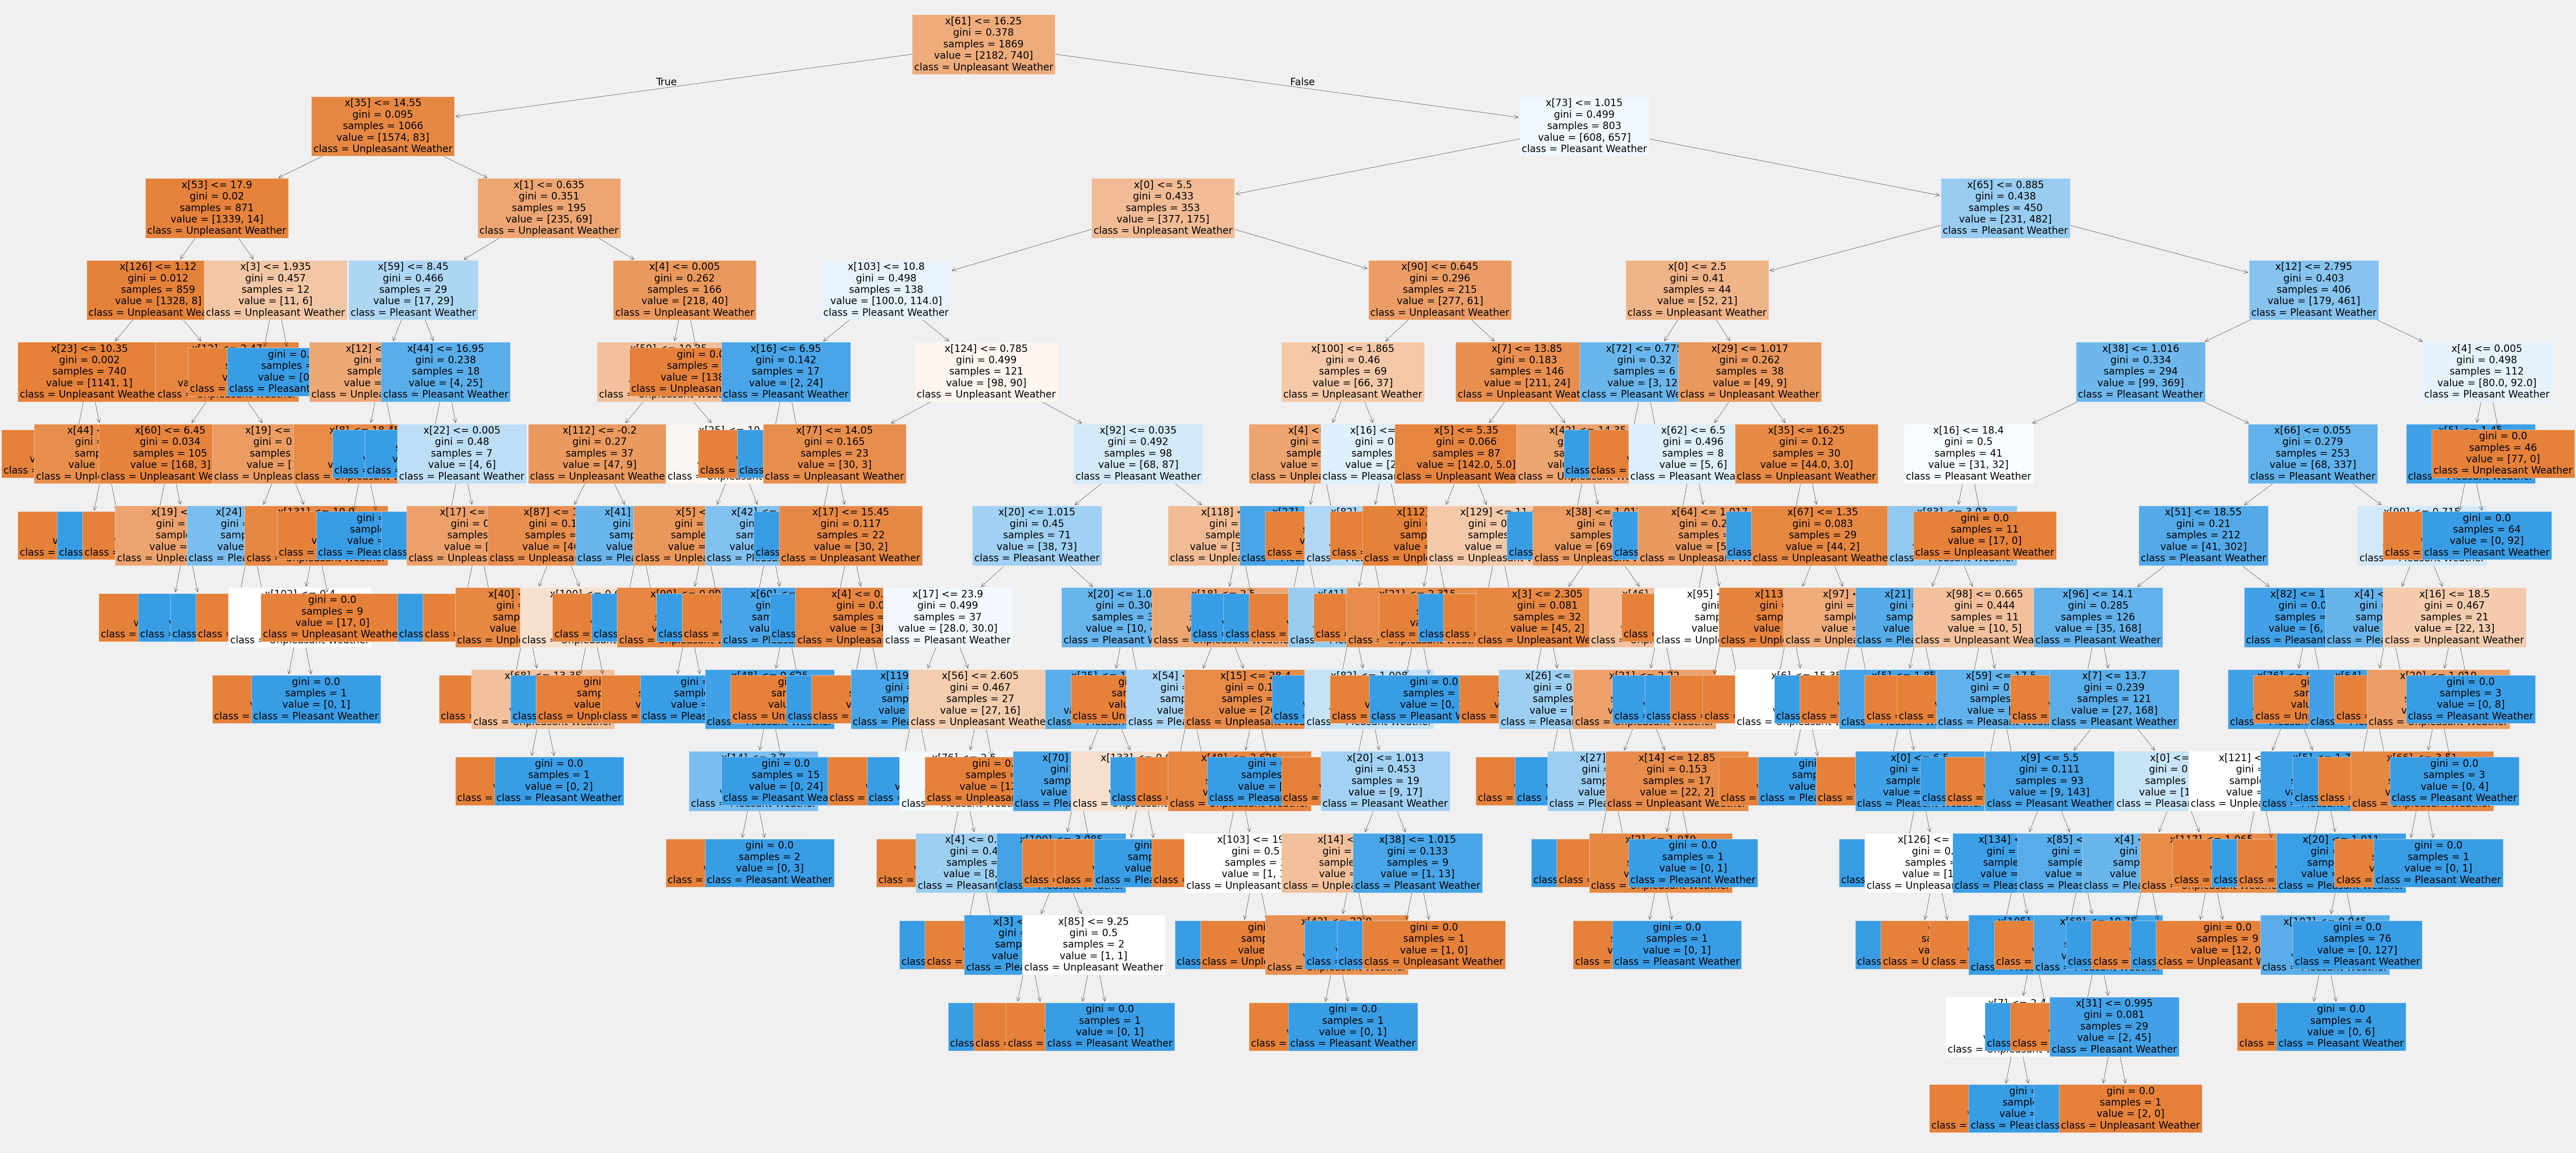

In [125]:
#Pleasant Weather indicator for class_names label at leaves
p_weather = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,
          class_names=p_weather);  # Adds class labels at the leaves

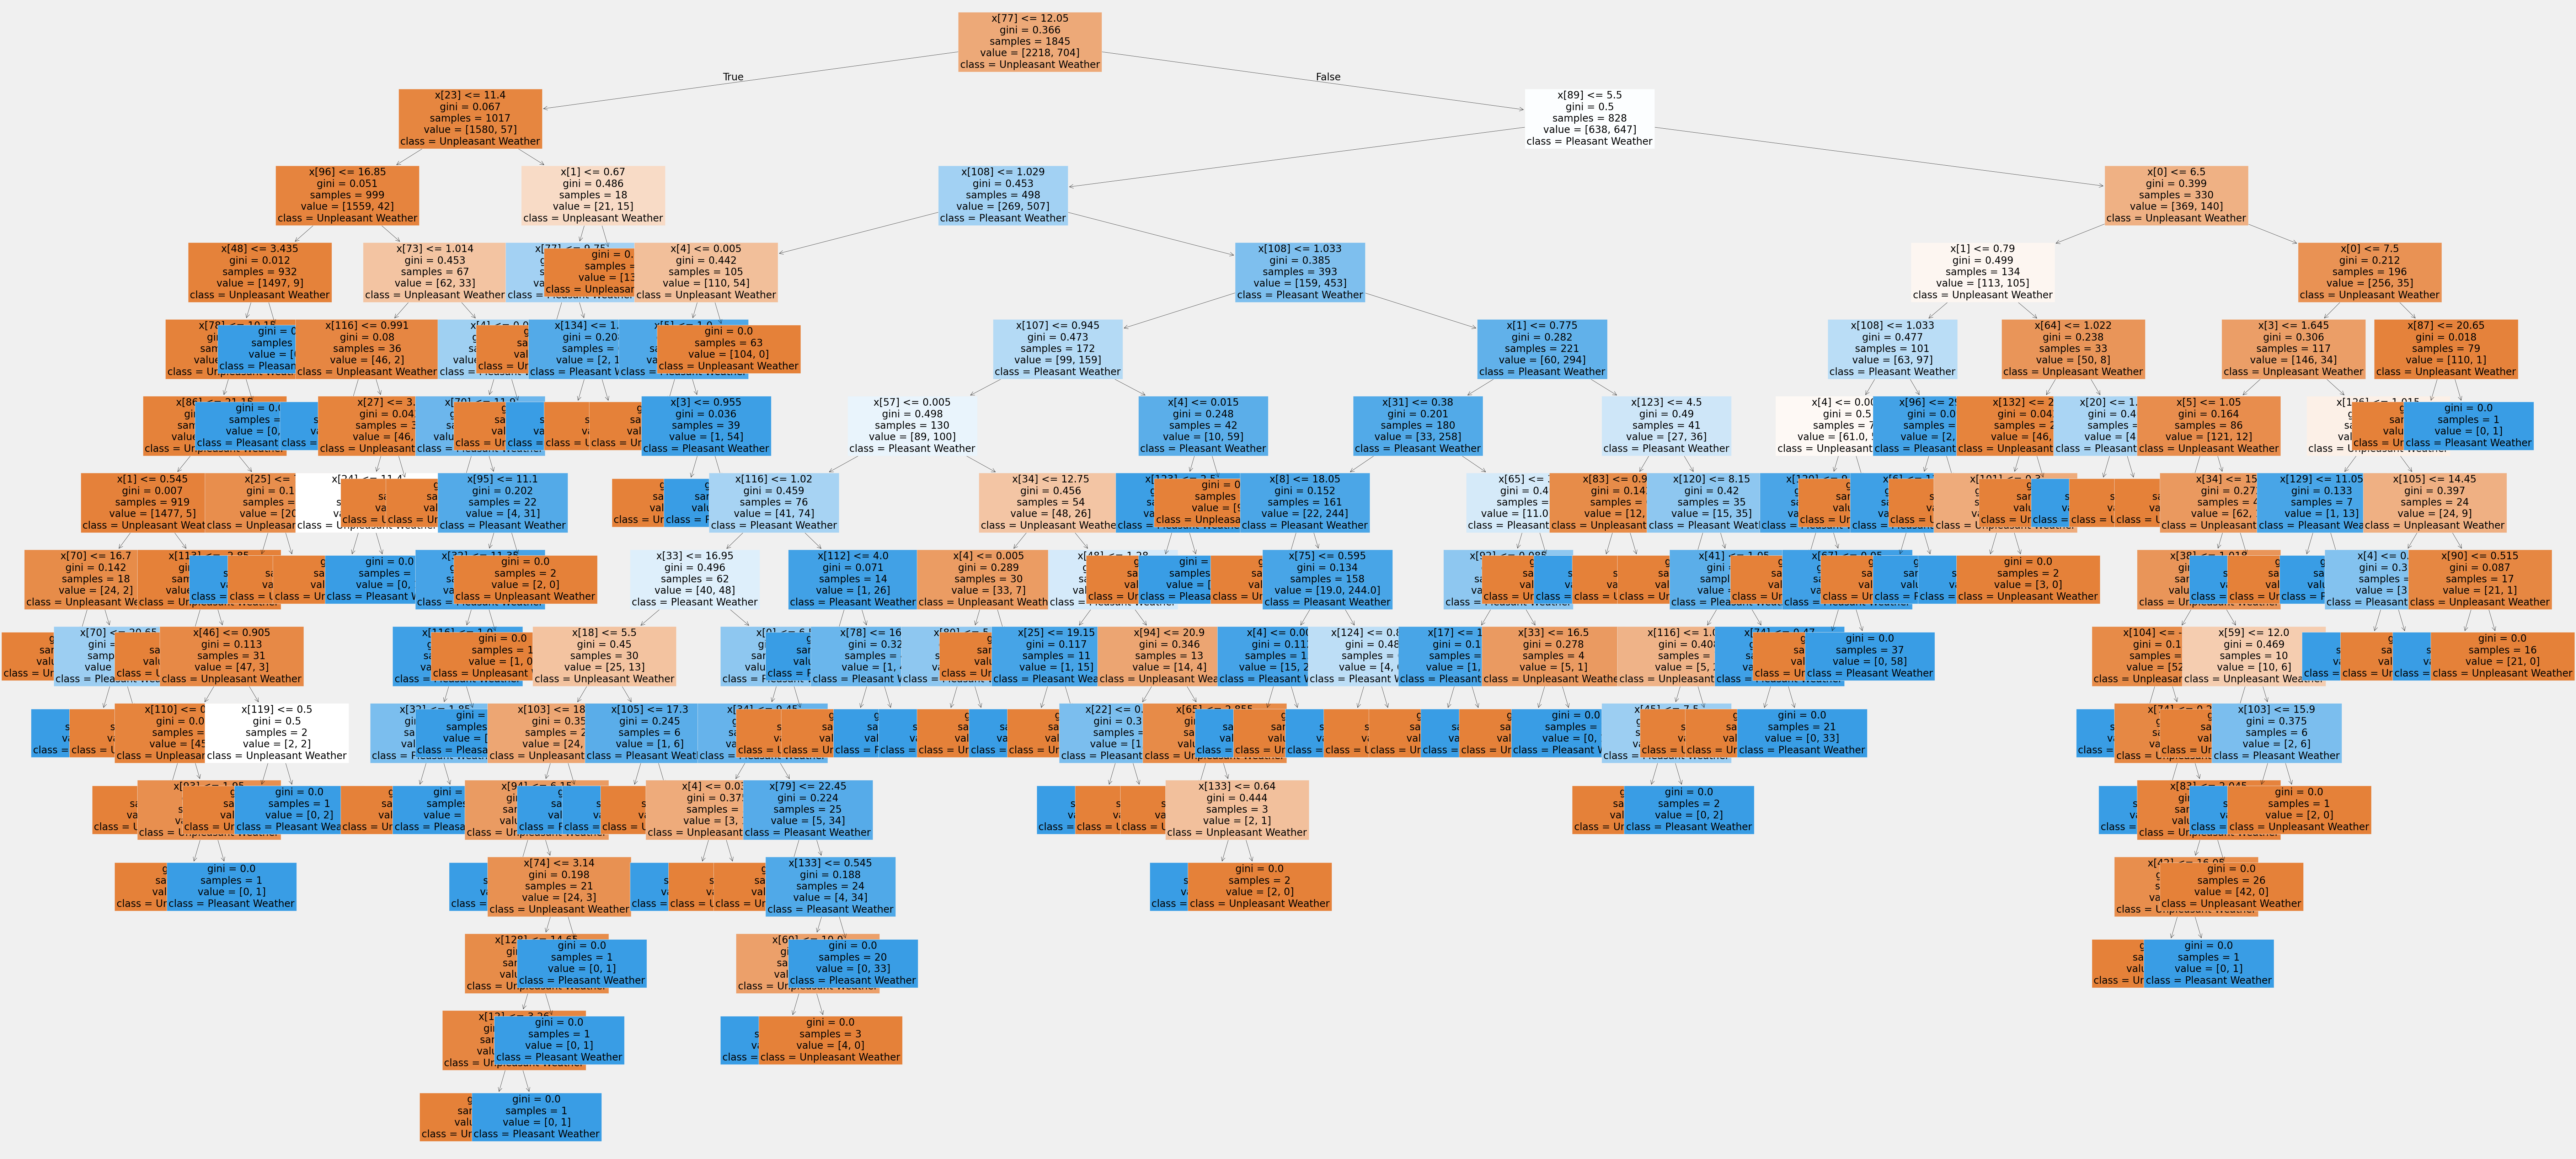

In [127]:
#Pleasant Weather indicator for class_names label at leaves
p_weather = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[55], 
          filled=True, 
          fontsize=20,
          feature_names=None,
          class_names=p_weather);  # Adds class labels at the leaves

### 4) Important Features

In [89]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02062067, 0.02788282, 0.00715824, 0.04448323, 0.14100615,
       0.05651378, 0.04323974, 0.00479164, 0.06656344, 0.00060507,
       0.00212037, 0.0025996 , 0.00226242, 0.00077097, 0.002281  ,
       0.00290042, 0.00191532, 0.00233244, 0.00114367, 0.00139547,
       0.00375413, 0.00185528, 0.00059155, 0.00180748, 0.00372913,
       0.00232669, 0.00549735, 0.00067758, 0.00162295, 0.00688199,
       0.00203238, 0.00338004, 0.00247738, 0.00910735, 0.00227741,
       0.01392666, 0.00144767, 0.00228307, 0.01145273, 0.00147164,
       0.00452429, 0.00247382, 0.01459297, 0.00181679, 0.03667751,
       0.00084777, 0.00259812, 0.00420119, 0.00214246, 0.00176012,
       0.00236457, 0.01195363, 0.0030671 , 0.01450963, 0.00261935,
       0.01099537, 0.00241598, 0.00355305, 0.00156135, 0.01618057,
       0.00324284, 0.0189168 , 0.00097433, 0.00122177, 0.0070591 ,
       0.00669337, 0.001106  , 0.00173308, 0.00485257, 0.00196598,
       0.00672755, 0.00171689, 0.00188433, 0.01110658, 0.00218

In [90]:
np.set_printoptions(threshold=1000)

In [92]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.02062067, 0.02788282, 0.00715824, 0.04448323, 0.14100615,
         0.05651378, 0.04323974, 0.00479164, 0.06656344],
        [0.00060507, 0.00212037, 0.0025996 , 0.00226242, 0.00077097,
         0.002281  , 0.00290042, 0.00191532, 0.00233244],
        [0.00114367, 0.00139547, 0.00375413, 0.00185528, 0.00059155,
         0.00180748, 0.00372913, 0.00232669, 0.00549735],
        [0.00067758, 0.00162295, 0.00688199, 0.00203238, 0.00338004,
         0.00247738, 0.00910735, 0.00227741, 0.01392666],
        [0.00144767, 0.00228307, 0.01145273, 0.00147164, 0.00452429,
         0.00247382, 0.01459297, 0.00181679, 0.03667751],
        [0.00084777, 0.00259812, 0.00420119, 0.00214246, 0.00176012,
         0.00236457, 0.01195363, 0.0030671 , 0.01450963],
        [0.00261935, 0.01099537, 0.00241598, 0.00355305, 0.00156135,
         0.01618057, 0.00324284, 0.0189168 , 0.00097433],
        [0.00122177, 0.0070591 , 0.00669337, 0.001106  , 0.00173308,
         0.00485257, 0.00196598, 0.0067275

In [93]:
# Sum across the 9 features for each station (collapse to one value per station)

sumarray = np.sum(newarray[0], axis=1)  # shape becomes (15,)

In [94]:
important = pd.Series(sumarray, index = stations) #.sort_values(ascending = False)
important

0     0.412260
1     0.017788
2     0.022101
3     0.042384
4     0.076740
5     0.043445
6     0.060460
7     0.033076
8     0.091192
9     0.032979
10    0.077038
11    0.017683
12    0.023471
13    0.018822
14    0.030562
dtype: float64

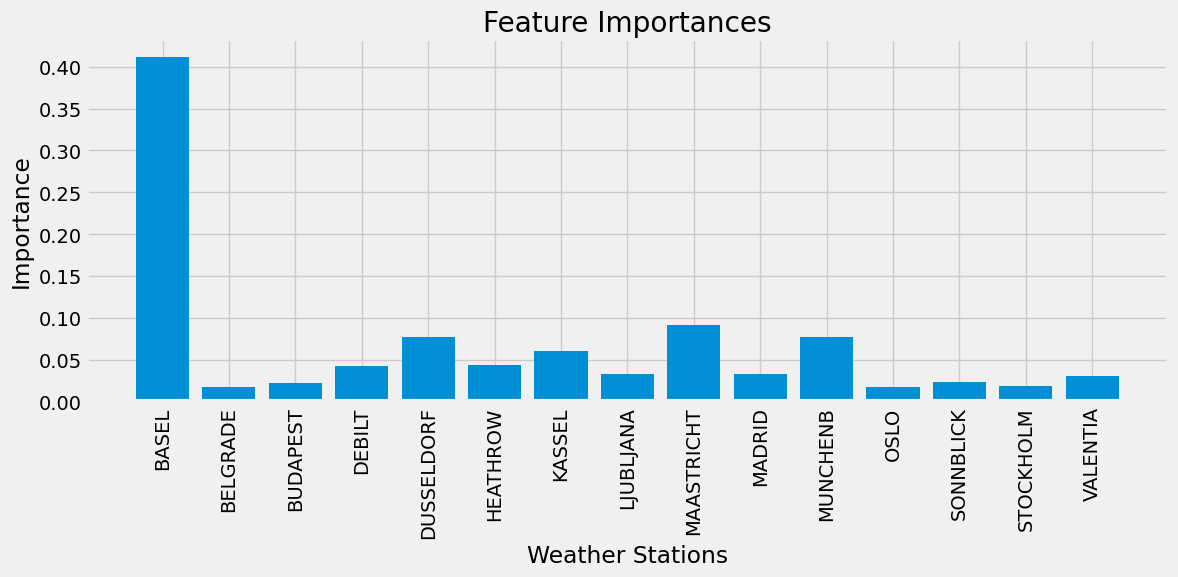

In [98]:
# Plot station importances with names on x-axis
plt.style.use('fivethirtyeight')
x_values = list(range(len(important)))
station_names = [stations[i] for i in sorted(stations.keys())]

plt.figure(figsize=(12,6))
plt.bar(x_values, important)
plt.xticks(x_values, station_names, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Weather Stations'); plt.title('Feature Importances')
plt.tight_layout()

Condensed version of the code above- formats the information between by organizing by importance over alphabetical order. Both will be included in the output.

feature_importances_ shape: (135,)
[0.02062067 0.02788282 0.00715824 0.04448323 0.14100615 0.05651378
 0.04323974 0.00479164 0.06656344 0.00060507 0.00212037 0.0025996
 0.00226242 0.00077097 0.002281   0.00290042 0.00191532 0.00233244
 0.00114367 0.00139547 0.00375413 0.00185528 0.00059155 0.00180748
 0.00372913 0.00232669 0.00549735 0.00067758 0.00162295 0.00688199
 0.00203238 0.00338004 0.00247738 0.00910735 0.00227741 0.01392666
 0.00144767 0.00228307 0.01145273 0.00147164 0.00452429 0.00247382
 0.01459297 0.00181679 0.03667751 0.00084777 0.00259812 0.00420119
 0.00214246 0.00176012 0.00236457 0.01195363 0.0030671  0.01450963
 0.00261935 0.01099537 0.00241598 0.00355305 0.00156135 0.01618057
 0.00324284 0.0189168  0.00097433 0.00122177 0.0070591  0.00669337
 0.001106   0.00173308 0.00485257 0.00196598 0.00672755 0.00171689
 0.00188433 0.01110658 0.00218533 0.00729915 0.00346625 0.02387455
 0.00461042 0.03561759 0.00114757 0.00160524 0.00203436 0.00224861
 0.00107703 0.00192853 0.010

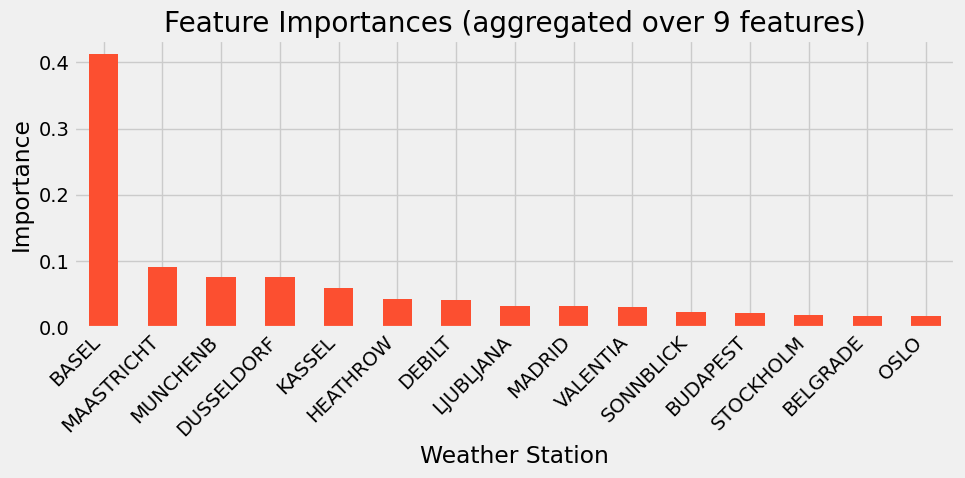

In [100]:
# 1) Raw importances (correspond to columns of x in order)
importances = clf.feature_importances_
print("feature_importances_ shape:", importances.shape)
print(importances)

# 2) Map importances back to feature names (optional)
feature_names = list(df_2000.drop(columns=['DATE','MONTH']).columns)
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feat_imp_df.head(10))

# 3) Aggregate per station (assumes column order is station1_feat1..station15_feat9)
imp_matrix = importances.reshape(15, 9)   # (15 stations, 9 measurements)
station_imp = imp_matrix.sum(axis=1)

# 4) Create labeled Series and sort
station_names = [stations[i] for i in sorted(stations.keys())]
station_importances = pd.Series(station_imp, index=station_names).sort_values(ascending=False)
print("\nStation importances (sorted):\n", station_importances)

# 5) Plot
plt.figure(figsize=(10,5))
station_importances.plot.bar(color='C1')
plt.ylabel('Importance')
plt.xlabel('Weather Station')
plt.title('Feature Importances (aggregated over 9 features)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### 5) Important Station Modeling

#### Basel

In [131]:
# Keep only BASEL variables and drop DATE / MONTH
df_basel = df[
    [col for col in df.columns if 'BASEL' in col and col not in ['DATE', 'MONTH']]
].reset_index(drop=True)

pleasant_basel = pleasant[
    [col for col in pleasant.columns if 'BASEL' in col and col not in ['DATE', 'MONTH']]
].reset_index(drop=True)

print(f"Climate BASEL data shape: {df_basel.shape}")
print(f"Pleasant BASEL data shape: {pleasant_basel.shape}")

print("\nClimate Data (BASEL) - First 5 rows:")
print(df_basel.head())

print("\nPleasant Weather Data (BASEL) - First 5 rows:")
print(pleasant_basel.head())

Climate BASEL data shape: (22950, 9)
Pleasant BASEL data shape: (22950, 1)

Climate Data (BASEL) - First 5 rows:
   BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14         

In [132]:
# Conversion step for BASEL
x = np.array(df_basel)                     # feature matrix for BASEL
y = np.array(pleasant_basel['BASEL_pleasant_weather'])  # target

# Check shapes
print("BASEL feature matrix shape:", x.shape)
print("BASEL target variable shape:", y.shape)

BASEL feature matrix shape: (22950, 9)
BASEL target variable shape: (22950,)


In [133]:
# Split the reshaped data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42
)

print("Train and Test Set Shapes:")
print("=" * 60)
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Train and Test Set Shapes:
X_train shape: (18360, 9)
X_test shape: (4590, 9)
y_train shape: (18360,)
y_test shape: (4590,)


In [134]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

RandomForestClassifier()

In [135]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


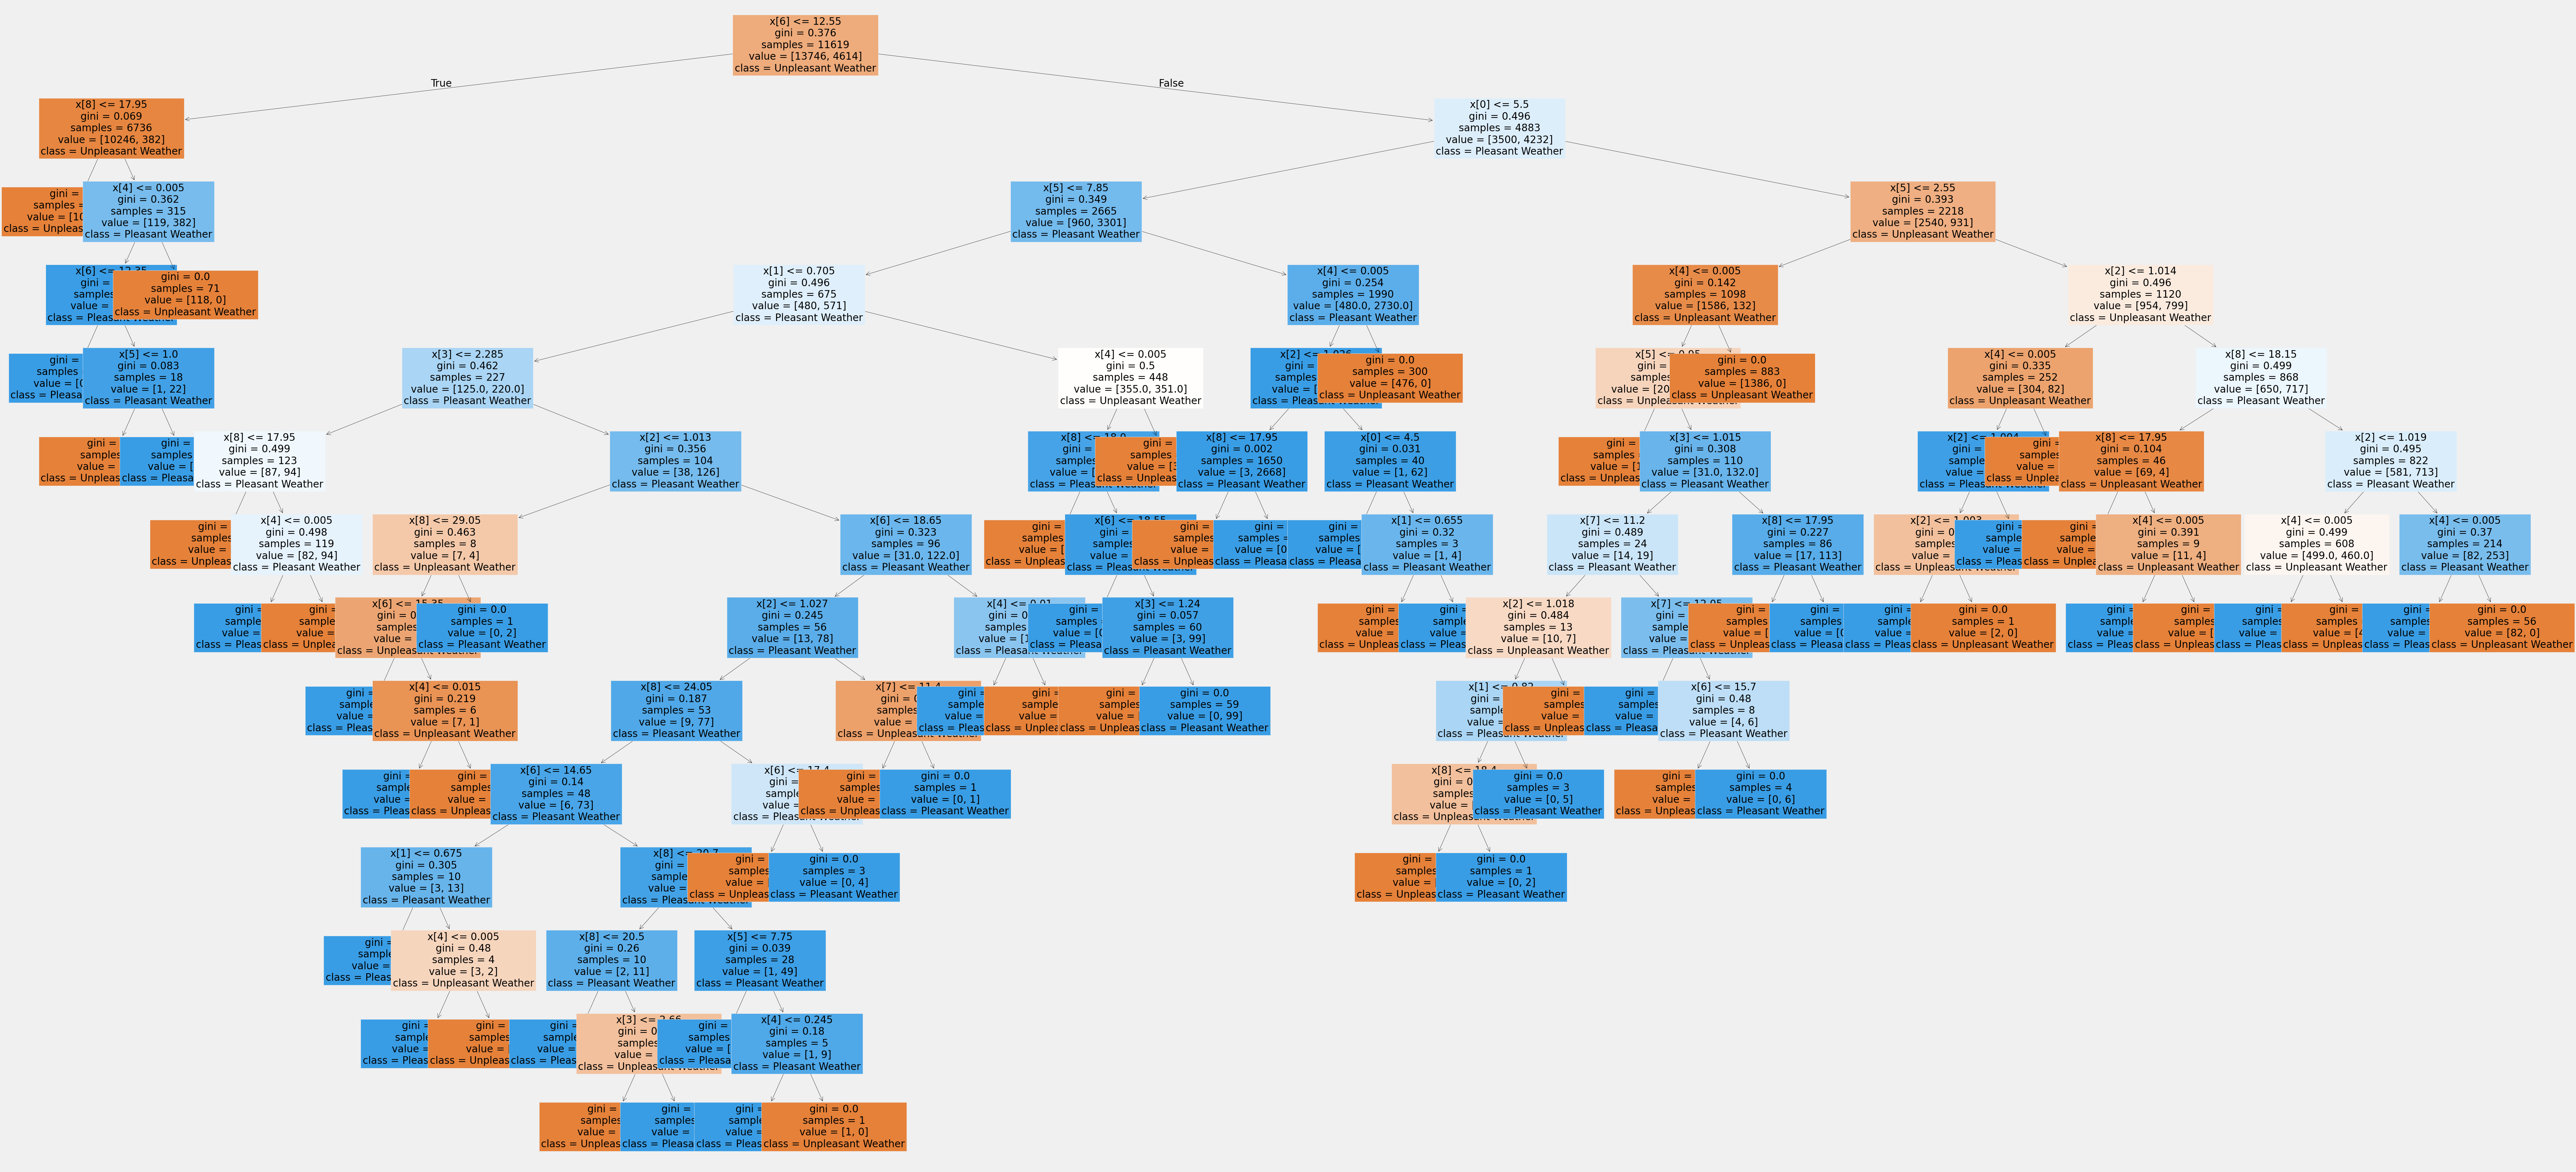

In [136]:
#Pleasant Weather indicator for class_names label at leaves
p_weather = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,
          class_names=p_weather);  # Adds class labels at the leaves

In [137]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.03473044, 0.01250839, 0.00970145, 0.0946913 , 0.3510554 ,
       0.09493691, 0.08011137, 0.02850315, 0.29376161])

In [139]:
#Clean feature names from BASEL columns

features = [feature.replace('BASEL_', '') for feature in df_basel]
features

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [140]:
# Create Series for feature importance

important = pd.Series(newarray, index=features).sort_values(ascending=False)
important

precipitation       0.351055
temp_max            0.293762
sunshine            0.094937
global_radiation    0.094691
temp_mean           0.080111
cloud_cover         0.034730
temp_min            0.028503
humidity            0.012508
pressure            0.009701
dtype: float64

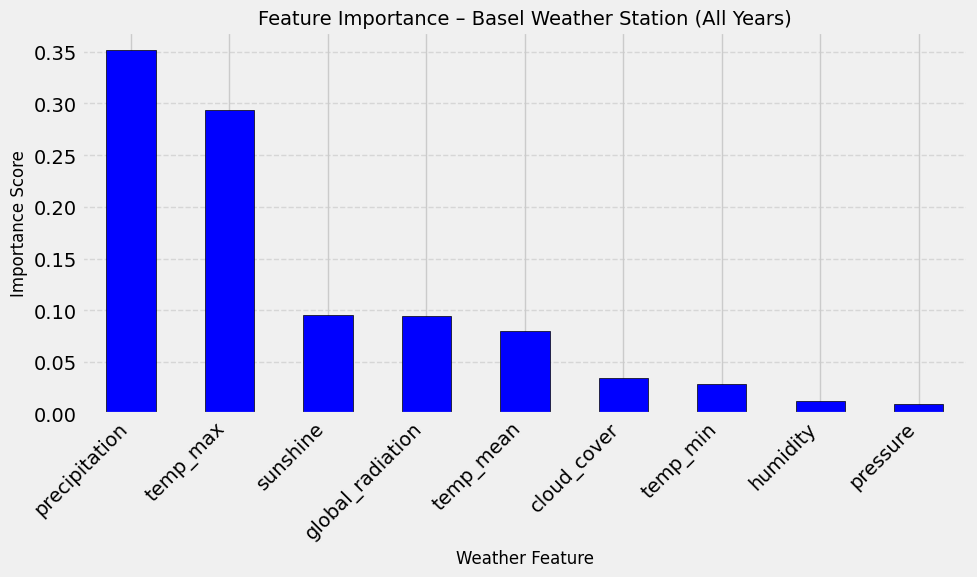

In [145]:
# Plot feature importance

plt.figure(figsize=(10, 6))
important.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Feature Importance – Basel Weather Station (All Years)', fontsize=14)
plt.xlabel('Weather Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Maastricht

In [146]:
# --- Maastricht: keep only MAASTRICHT variables and drop DATE / MONTH
df_maastricht = df[[col for col in df.columns if 'MAASTRICHT' in col and col not in ['DATE','MONTH']]].reset_index(drop=True)
pleasant_maastricht = pleasant[[col for col in pleasant.columns if 'MAASTRICHT' in col and col not in ['DATE','MONTH']]].reset_index(drop=True)

print(f"Climate MAASTRICHT data shape: {df_maastricht.shape}")
print(f"Pleasant MAASTRICHT data shape: {pleasant_maastricht.shape}")
print("\nClimate Data (MAASTRICHT) - First 5 rows:")
print(df_maastricht.head())
print("\nPleasant Weather Data (MAASTRICHT) - First 5 rows:")
print(pleasant_maastricht.head())

# --- Conversion step for MAASTRICHT
x_maas = np.array(df_maastricht)
y_maas = np.array(pleasant_maastricht['MAASTRICHT_pleasant_weather'])

print("MAASTRICHT feature matrix shape:", x_maas.shape)
print("MAASTRICHT target variable shape:", y_maas.shape)

Climate MAASTRICHT data shape: (22950, 9)
Pleasant MAASTRICHT data shape: (22950, 1)

Climate Data (MAASTRICHT) - First 5 rows:
   MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   
1                       8                 0.92               1.0062   
2                       7                 0.97               1.0167   
3                       7                 0.89               1.0277   
4                       7                 0.92               1.0259   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   
1                         0.17                      1.34                  0.4   
2                         0.12                      0.46                  0.0   
3                         0.16                      0.00                  0.3   
4                         0.12          

X_train: (18360, 9) X_test: (4590, 9) y_train: (18360,) y_test: (4590,)
Model Accuracy: 1.0


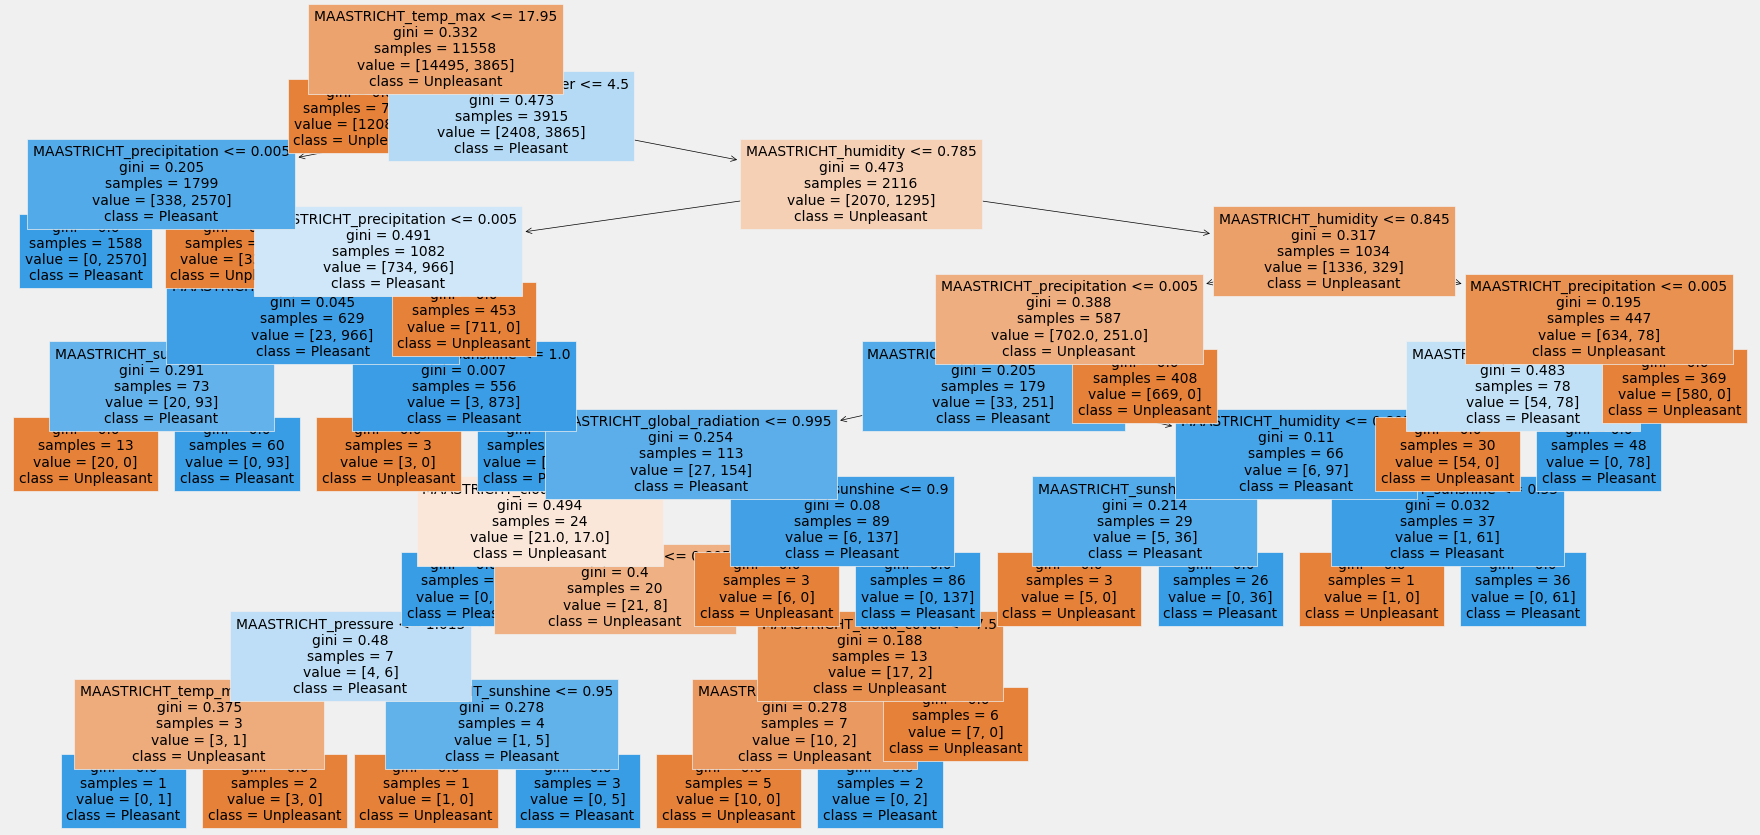

In [147]:
# --- Train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_maas, y_maas, test_size=0.2, random_state=42)
print("X_train:", x_train.shape, "X_test:", x_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

# --- Random Forest for MAASTRICHT
clf_maas = RandomForestClassifier(n_estimators=100, random_state=42)
clf_maas.fit(x_train, y_train)
y_pred = clf_maas.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

# --- Plot one tree (optional)
fig = plt.figure(figsize=(20, 10))
plot_tree(clf_maas.estimators_[15], filled=True, fontsize=10, feature_names=df_maastricht.columns, class_names=['Unpleasant','Pleasant'])
plt.show()

Top MAASTRICHT features:
 precipitation       0.309211
temp_max            0.302635
temp_mean           0.115604
global_radiation    0.094635
sunshine            0.079420
cloud_cover         0.033430
humidity            0.027946
temp_min            0.022772
pressure            0.014346
dtype: float64


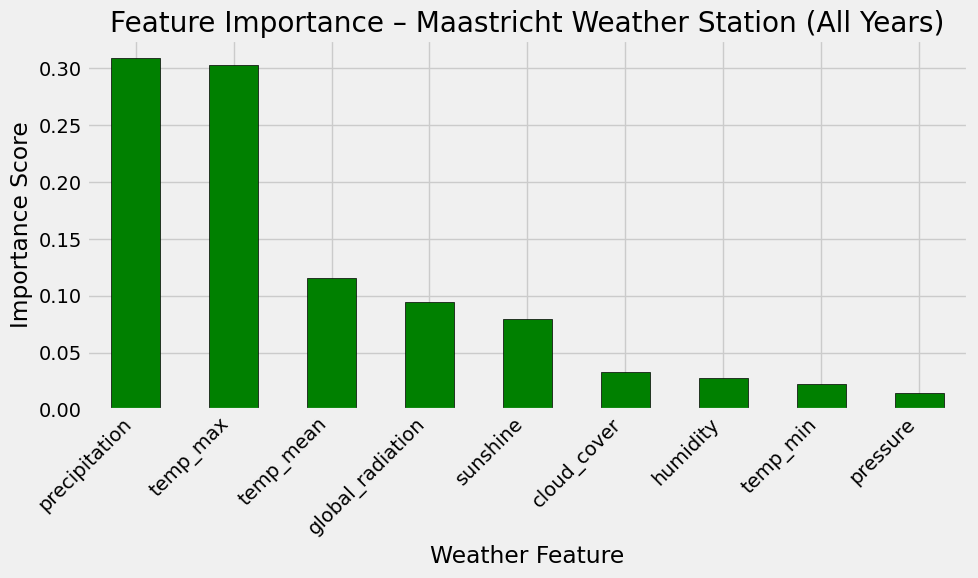

In [149]:
# --- Feature importances (clean names)
newarray_maas = clf_maas.feature_importances_
features_maas = [f.replace('MAASTRICHT_', '') for f in df_maastricht.columns]

important_maas = pd.Series(newarray_maas, index=features_maas).sort_values(ascending=False)
print("Top MAASTRICHT features:\n", important_maas.head(10))

# --- Plot feature importances
plt.figure(figsize=(10,6))
important_maas.plot(kind='bar', color='Green', edgecolor='black')
plt.title('Feature Importance – Maastricht Weather Station (All Years)')
plt.xlabel('Weather Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Munchenb

In [150]:
# ---- Munchenb: keep only MUNCHENB variables and drop DATE / MONTH
df_munchenb = df[[col for col in df.columns if 'MUNCHENB' in col and col not in ['DATE','MONTH']]].reset_index(drop=True)
pleasant_munchenb = pleasant[[col for col in pleasant.columns if 'MUNCHENB' in col and col not in ['DATE','MONTH']]].reset_index(drop=True)

print(f"Climate MUNCHENB data shape: {df_munchenb.shape}")
print(f"Pleasant MUNCHENB data shape: {pleasant_munchenb.shape}")
print("\nClimate Data (MUNCHENB) - First 5 rows:")
print(df_munchenb.head())
print("\nPleasant Weather Data (MUNCHENB) - First 5 rows:")
print(pleasant_munchenb.head())

# --- Conversion step for MUNCHENB
x_mun = np.array(df_munchenb)
y_mun = np.array(pleasant_munchenb['MUNCHENB_pleasant_weather'])

print("MUNCHENB feature matrix shape:", x_mun.shape)
print("MUNCHENB target variable shape:", y_mun.shape)

Climate MUNCHENB data shape: (22950, 9)
Pleasant MUNCHENB data shape: (22950, 1)

Climate Data (MUNCHENB) - First 5 rows:
   MUNCHENB_cloud_cover  MUNCHENB_humidity  MUNCHENB_global_radiation  \
0                     5               0.67                       0.20   
1                     6               0.72                       0.61   
2                     6               0.91                       0.20   
3                     6               0.90                       0.20   
4                     5               0.85                       0.65   

   MUNCHENB_precipitation  MUNCHENB_sunshine  MUNCHENB_temp_mean  \
0                    0.10                0.0                 6.9   
1                    0.30                5.1                 6.2   
2                    0.30                0.0                 5.8   
3                    0.01                0.0                 3.9   
4                    0.96                5.6                 1.8   

   MUNCHENB_temp_min  MUNCHENB

X_train: (18360, 9) X_test: (4590, 9) y_train: (18360,) y_test: (4590,)
Model Accuracy: 1.0


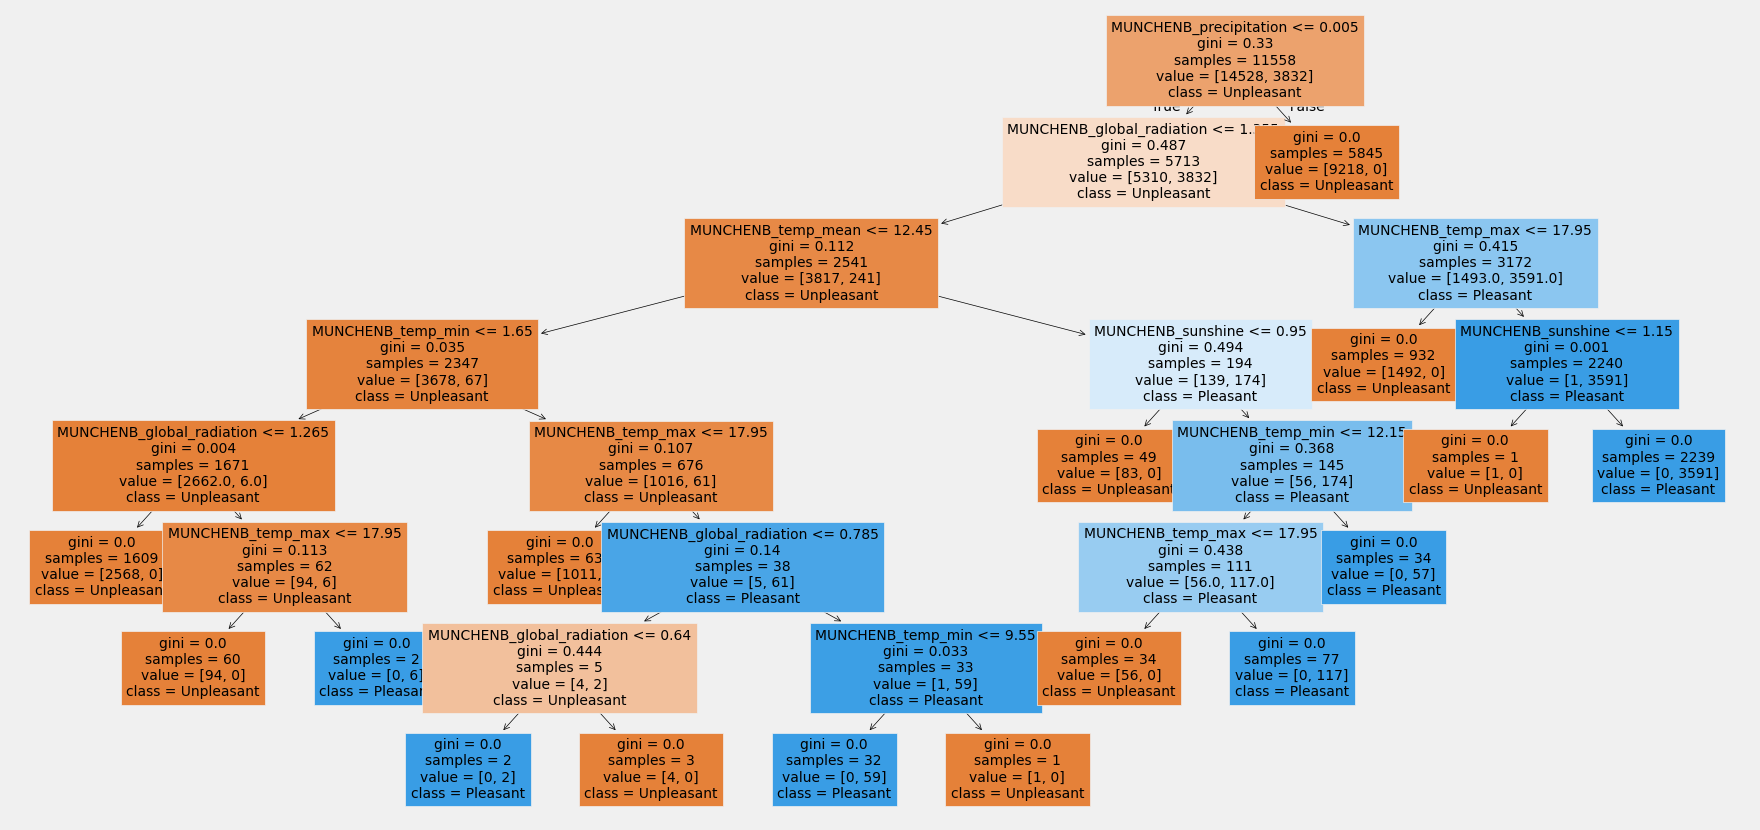

In [151]:
# --- Train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_mun, y_mun, test_size=0.2, random_state=42)
print("X_train:", x_train.shape, "X_test:", x_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

# --- Random Forest for MUNCHENB
clf_mun = RandomForestClassifier(n_estimators=100, random_state=42)
clf_mun.fit(x_train, y_train)
y_pred = clf_mun.predict(x_test)
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

# --- Plot one tree (optional)
fig = plt.figure(figsize=(20, 10))
plot_tree(clf_mun.estimators_[15], filled=True, fontsize=10, feature_names=df_munchenb.columns, class_names=['Unpleasant','Pleasant'])
plt.show()

Top MUNCHENB features:
 precipitation       0.374669
temp_max            0.291635
temp_mean           0.096714
sunshine            0.089110
global_radiation    0.074600
cloud_cover         0.040527
temp_min            0.014367
pressure            0.012187
humidity            0.006191
dtype: float64


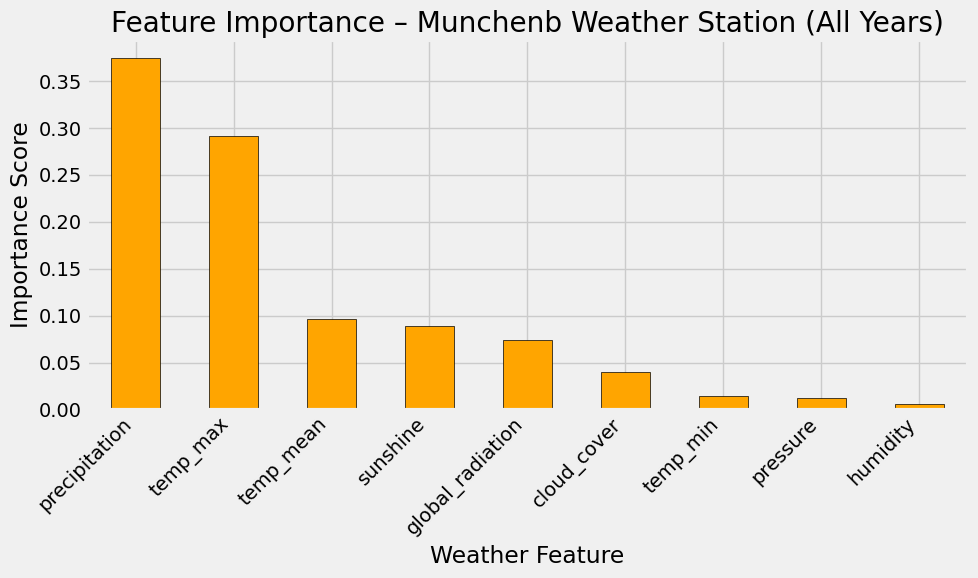

In [152]:
# --- Feature importances (clean names)
newarray_mun = clf_mun.feature_importances_
features_mun = [f.replace('MUNCHENB_', '') for f in df_munchenb.columns]

important_mun = pd.Series(newarray_mun, index=features_mun).sort_values(ascending=False)
print("Top MUNCHENB features:\n", important_mun.head(10))

# --- Plot feature importances
plt.figure(figsize=(10,6))
important_mun.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Feature Importance – Munchenb Weather Station (All Years)')
plt.xlabel('Weather Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()